# Linear Regression

Linear regression is one of the simplest models there is. It assumes that there is a linear relation between the attributes to the target variable. It is very simple but it also works very good. 

"All models are wrong, but some are useful".  
-- <cite> George Box.
    
What it is trying to find is the relationship:
$$Y = \beta_{0} + \beta_{1}X$$
Which is basically the line equation. We want to find those coefficients, beta 0 and beta 1. It can be extended to n attributes and n + 1 unknown coefficients.

Here we are dealing with estimates, not the true value, so we can use the following formula:
    
$$\hat{y}_{i} = \hat{\beta}_{0} + \hat{\beta}_{1}*x_{i}$$

Which is the prediction of our regression. Then, we need the residual, which is:
$$e_{i} = y_{i} - \hat{y}_{i}$$
    
The true value minus the predicted value for the i point. The sum of all the squared errors is the function that the regression must minimize.
    $$RSS = e^{2}_{1} + e^{2}_{2} + ... + e^{2}_{n}$$
But we can expand that expression into:
$$RSS = (y_{1} - \hat{y}_{1})^{2} + (y_{2} - \hat{y}_{2})^{2} + ... + (y_{n} - \hat{y}_{n})^{2}$$

Even more:
$$RSS = (y_{1} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{1})^{2} + (y_{2} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{2})^{2} + ... + (y_{n} - \hat{\beta}_{0} + \hat{\beta}_{1}*x_{3})^{2}$$
    
They way of minimizing the RSS, the algorithm will find the $\beta_{0}$ and $\beta_{1}$ that optimize the function.
    
$$\hat{\beta_{1}} = \frac{\sum^{n}_{i=1} (x_{i} - \bar{x})(y_{i} - \bar{y})}{\sum^{n}_{i=1} (x_{i}-\bar{x})^{2}}$$
$$\hat{\beta_{0}} = \bar{y} - \hat{\beta_{1}} * \bar{x}$$

Now, implement a linear regression without sklearn. In other words, find both coefficients and the Residual Sum of Squares (RSS). We are using a dataset about Teen Birth Rate. We want to predict the teen birth rate depending on the poverty of the state. The dataset is from the United States.

# The Dataset

Poverty rates, teen birth rates and violent crime rate in the states of the U.S and in the Disctirct of Columbia. Data are for the year 2000. (Source: U.S. Census Bureau, www.census.gov)

There are six columns of data:
+ Location: State name 
+ PovPct: Percentage of population living in households with income below "poverty level" 
+ Brth15to17: Birth rate for females 15 to 17 years old = births per 1,000 persons in group. 
+ Brth18to19: Birth rate for females 18 to 19 years old = births per 1,000 persons in group.  
+ ViolCrime: Violent crime rate in state
+ TeenBrth: Birth rate for females 15 to 19 years old = births per 1,000 persons in g

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string

In [2]:
dataset = pd.read_csv('OLSDataset.txt',sep='\s+')

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Location    51 non-null     object 
 1   PovPct      51 non-null     float64
 2   Brth15to17  51 non-null     float64
 3   Brth18to19  51 non-null     float64
 4   ViolCrime   51 non-null     float64
 5   TeenBrth    51 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.5+ KB


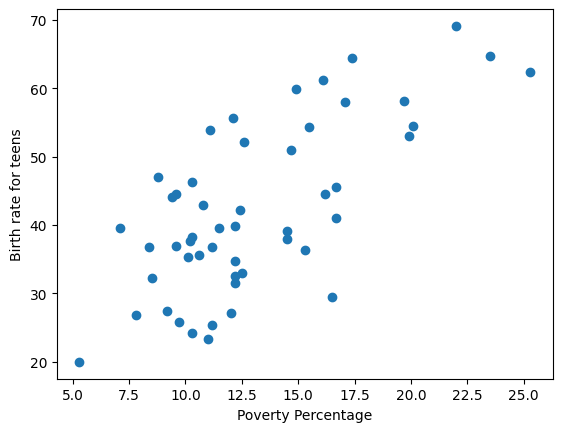

In [4]:
plt.scatter(dataset['PovPct'], dataset['TeenBrth']) 
plt.xlabel("Poverty Percentage")
plt.ylabel("Birth rate for teens")
plt.show() 


In [5]:
X = dataset['PovPct']
y = dataset['TeenBrth']

N = len(X)
X_mean = X.mean()
y_mean = y.mean()

B1 = (((X - X_mean) * (y - y_mean)).sum()) / (((X - X_mean)**2).sum())
B0 = y_mean - (B1*X_mean)

y_pred = B0 + B1*X

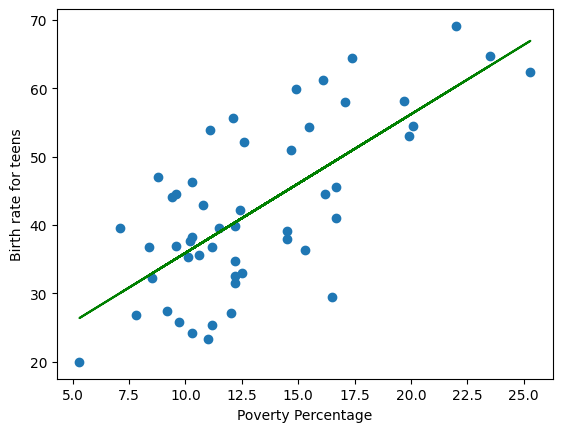

In [6]:
plt.scatter(dataset['PovPct'], dataset['TeenBrth']) 
plt.plot(dataset['PovPct'],y_pred,color='g')
plt.xlabel("Poverty Percentage")
plt.ylabel("Birth rate for teens")
plt.show()

In [7]:
MSE = (((y-y_pred)**2).sum())/N
MSE

75.18712192231092

In [8]:
SST = (((y-y_mean)**2).sum())/N
SST

148.77029603998463

In [9]:
r2 = 1 - (MSE/SST)
r2

0.4946093143344753

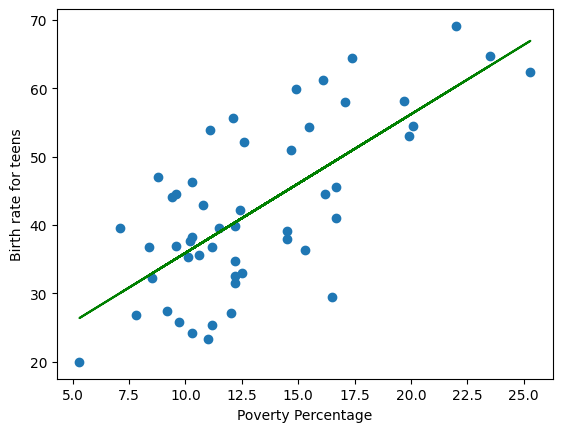

In [10]:
def simple_linear_regression(X, y):
    N = len(X)
    X_mean = X.mean()
    y_mean = y.mean()

    B1 = (((X - X_mean) * (y - y_mean)).sum()) / (((X - X_mean)**2).sum())
    B0 = y_mean - (B1*X_mean)

    y_pred = B0 + B1*X
    
    MSE = (((y-y_pred)**2).sum())/N
    SST = (((y-y_mean)**2).sum())/N
    r2 = 1 - (MSE/SST)
    
    return y_pred, MSE, r2

X1 = dataset['PovPct']
y1 = dataset['TeenBrth']
y_pred_1, MSE_1, r_2_1 = simple_linear_regression(X1,y1)

plt.scatter(dataset['PovPct'], dataset['TeenBrth']) 
plt.plot(X1, y_pred_1,color='g')
plt.xlabel("Poverty Percentage")
plt.ylabel("Birth rate for teens")
plt.show()
    

## Exercise

This time, do it the right way. Do a regression for three different train and test divisions, and then calculate the MSE for each one. Plot the three regressions.

In [11]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, train_size = .75)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, train_size = .50)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, train_size = .25)

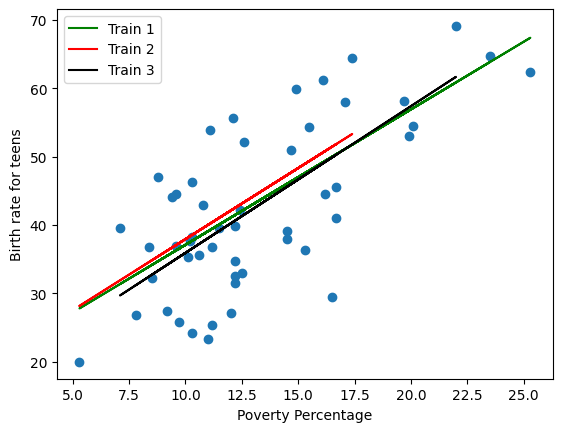

In [12]:
y_pred1, MSE1, r2_1 = simple_linear_regression(X_train1,y_train1)
y_pred2, MSE2, r2_2 = simple_linear_regression(X_train2,y_train2)
y_pred3, MSE3, r2_3 = simple_linear_regression(X_train3,y_train3)

plt.scatter(dataset['PovPct'], dataset['TeenBrth']) 
plt.plot(X_train1, y_pred1,color='g', label= 'Train 1')
plt.plot(X_train2, y_pred2,color='r', label= 'Train 2')
plt.plot(X_train3, y_pred3,color='k', label= 'Train 3')
plt.xlabel("Poverty Percentage")
plt.ylabel("Birth rate for teens")
plt.legend()
plt.show()

In [13]:
print("MSE Training Set 1:", MSE1)
print("MSE Training Set 2:", MSE2)
print("MSE Training Set 3:", MSE3)

MSE Training Set 1: 71.34408941241541
MSE Training Set 2: 76.31095914723034
MSE Training Set 3: 45.73478711580527


In [14]:
print("R-squared Training Set 1:", r2_1)
print("R-squared Training Set 2:", r2_2)
print("R-squared Training Set 3:", r2_3)

R-squared Training Set 1: 0.5222478651516373
R-squared Training Set 2: 0.38836256588039986
R-squared Training Set 3: 0.6393698731692968


# Multiple Linear Regression

The same can be done but with multiple attributes. In this case, there will be one coefficient for each attribute:  

$$y = \beta_{0} + \beta_{1}x_{1} + \beta_{2}x_{2} + ... + \beta_{n}x_{n} + \epsilon$$  


Use the following dataset, to predict the G3 column. It is the grade of the year for the students. Multiple variables are categorical, remember to convert them to numerical. Other columns might not add value to the prediction, so you can also do some feature engineering. 

Usually while computing regression, we need to add a new column for the intercept term, in the data. That way we can do:
$$f(x') = \beta^{'T}x'$$
Because $\beta'$ will contain the intercept term, $\beta' = (\beta_{0},\beta_{1},...,\beta_{n})$

That gives us the following equation:

$$y = X*\beta+\epsilon$$

The optimization problem is to find the $\hat\beta$ that minimize the loss $L(\hat{\beta}) = \hat{\epsilon}^{T}\hat{\epsilon}$
The solution is:

$$\hat{\beta} = (X^{T}X)^{-1}X^{T}y$$

Inverting takes $O(n^{3})$ so it is unfeasible for datasets with many dimensions.

In [15]:
X = dataset[['PovPct','ViolCrime']]
y = dataset['TeenBrth']

In [16]:
X["Intercept"] = 1
X = X[['Intercept','PovPct','ViolCrime']]

C:\Users\ynino\AppData\Local\Temp\ipykernel_11660\2699099029.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Intercept"] = 1


In [17]:
X.head()

,Intercept,PovPct,ViolCrime
0,1,20.1,11.2
1,1,7.1,9.1
2,1,16.1,10.4
3,1,14.9,10.4
4,1,16.7,11.2


In [18]:
X_T = X.T
B = np.linalg.inv(X_T @ X) @ X_T @ y
B.index = X.columns
B

Intercept    17.684806
PovPct        1.630444
ViolCrime     0.403664
dtype: float64

In [19]:
B.shape

(3,)

In [20]:
X.shape

(51, 3)

In [21]:
predictions = X @ B

In [22]:
MSE = (((y-predictions)**2).sum())/N
SST = (((y-y_mean)**2).sum())/N
r2 = 1 - (MSE/SST)
print("MSE:", MSE), 
print("R-squared:", r2)

MSE: 65.29201124969937
R-squared: 0.5611219915019126


In [23]:
import statsmodels.api as sm

X = dataset[['PovPct','ViolCrime']]
y = dataset['TeenBrth']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     30.68
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           2.61e-09
Time:                        22:06:33   Log-Likelihood:                -178.93
No. Observations:                  51   AIC:                             363.9
Df Residuals:                      48   BIC:                             369.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6848      3.869      4.571      0.0

In [30]:
def multi_linear_regression(X,y):
    X.insert(0,'Intercept', 1)
    X_T = X.T
    
    B = np.linalg.inv(X_T @ X) @ X_T @ y
    B.index = X.columns
    print(B)
    
    predictions = X @ B
    
    MSE = (((y-predictions)**2).sum())/N
    SST = (((y-y_mean)**2).sum())/N
    r2 = 1 - (MSE/SST)
    
    print("MSE:", MSE), 
    print("R-squared:", r2)
    
    return predictions, MSE, r2

In [31]:
X = dataset[['Brth15to17', 'Brth18to19','ViolCrime']]
y = dataset['TeenBrth']
predictions, MSE, r2 = multi_linear_regression(X,y)

Intercept     0.090331
Brth15to17    0.605970
Brth18to19    0.395803
ViolCrime     0.018437
dtype: float64
MSE: 0.3396732422362075
R-squared: 0.9977167939348262


In [26]:
import statsmodels.api as sm

X = dataset[['Brth15to17', 'Brth18to19','ViolCrime']]
y = dataset['TeenBrth']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:               TeenBrth   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     6846.
Date:                Mon, 06 Mar 2023   Prob (F-statistic):           4.68e-62
Time:                        22:06:33   Log-Likelihood:                -44.832
No. Observations:                  51   AIC:                             97.66
Df Residuals:                      47   BIC:                             105.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0903      0.399      0.226      0.8

# Polynomial Regression

What if the data is not linear? In that case, a linear regression wouldn't work because it does not capture how the data is. Then, we can try to fit a regression but in a with a higher polynomial. This can be done by transforming the data in the following way:


$$X = \begin{pmatrix}
1 & x_{1} & x_{1}^{2} & x_{1}^{3}\\
1 & x_{2} & x_{2}^{2} & x_{2}^{3}\\
\vdots & \vdots & \vdots & \vdots \\
1 & x_{3} & x_{3}^{2} & x_{3}^{3}\\
\end{pmatrix}$$

We take each input and take it into a higher polynomial. Also, include the intercept term. We can do it again by hand, but in this case, we are going to use our friend Sklearn.

In [28]:
def functionf(x):
    arr = []
    for i in x:
        arr.append(2-i+(i**2)) #2 - x + x^2
    return np.array(arr)

In [29]:
def sample_ds(n):
    x = np.random.uniform(-3,3,n)
    e = np.random.normal(0,0.4,n)
    y = np.add(functionf(x),e)
    return x,y

## Exercise

Train a linear regression for polynomials between 1 and 8, calculate the MSE for training set, validation set and test set. Generate a train set of 10 points, then a validation set of 10 points and then a test set of 1000 points. Fit a linear regression with polynomial features.

In [35]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def polynomial_regression(X_train, y_train, X_val, y_val, X_test, y_test, degree):
    #polinomial regression
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    #train with training data
    model.fit(X_train.reshape(-1,1), y_train)

    #calculate MSE
    MSE_train = mean_squared_error(y_train, model.predict(X_train.reshape(-1,1)))
    MSE_val = mean_squared_error(y_val, model.predict(X_val.reshape(-1,1)))
    MSE_test = mean_squared_error(y_test, model.predict(X_test.reshape(-1,1)))

    return MSE_train, MSE_val, MSE_test

#use sample_ds
X_train, y_train = sample_ds(10)
X_val, y_val = sample_ds(10)
X_test, y_test = sample_ds(1000)

#MSE for 1 to 8 polynomial degrees
for degree in range(1, 9):
    MSE_train, MSE_val, MSE_test = polynomial_regression(X_train, y_train, X_val, y_val, X_test, y_test, degree)
    print(f"Degree {degree}: Train MSE = {MSE_train:.4f}, Val MSE = {MSE_val:.4f}, Test MSE = {MSE_test:.4f}")


Degree 1: Train MSE = 2.8998, Val MSE = 10.9095, Test MSE = 8.7886
Degree 2: Train MSE = 0.0938, Val MSE = 0.2777, Test MSE = 0.2746
Degree 3: Train MSE = 0.0762, Val MSE = 0.2386, Test MSE = 0.3247
Degree 4: Train MSE = 0.0757, Val MSE = 0.2178, Test MSE = 0.2634
Degree 5: Train MSE = 0.0683, Val MSE = 1.1369, Test MSE = 1.7046
Degree 6: Train MSE = 0.0277, Val MSE = 46.5676, Test MSE = 126.8119
Degree 7: Train MSE = 0.0020, Val MSE = 96.5649, Test MSE = 749.2080
Degree 8: Train MSE = 0.0003, Val MSE = 1341.1253, Test MSE = 470.7205
